In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.cluster import KMeans

import scipy.stats as stats

df =  pd.read_csv('caesarian.csv', delimiter=';')

print(df.shape)
print(df.head(10))
print(df.info())
print(df.describe())
print("_______")
print("Уникальные значения столбца 'age_group'")
print(df['Caesarian'].unique())
print("_______")
print("Количество значений в группах:")
print(df['Caesarian'].value_counts())
print("_______")

(80, 6)
   Age  Delivery number  Delivery time  Blood of Pressure  Heart Problem  \
0   22                1              0                  2              0   
1   26                2              0                  1              0   
2   26                2              1                  1              0   
3   28                1              0                  2              0   
4   22                2              0                  1              0   
5   26                1              1                  0              0   
6   27                2              0                  1              0   
7   32                3              0                  1              0   
8   28                2              0                  1              0   
9   27                1              1                  1              0   

   Caesarian  
0          0  
1          1  
2          0  
3          0  
4          1  
5          0  
6          0  
7          1  
8          0  
9    

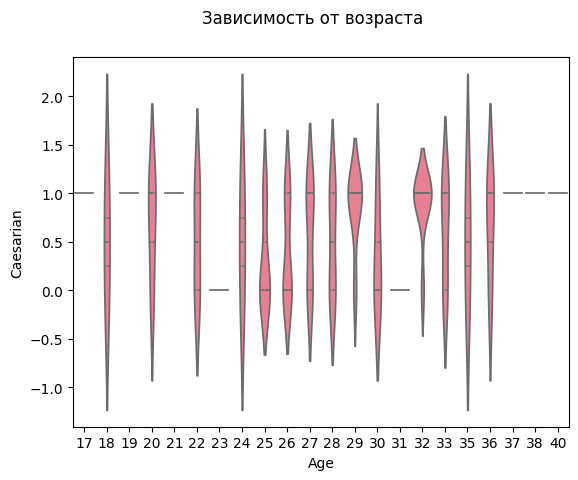

In [11]:
sns.violinplot(y='Caesarian', x='Age', data=df, inner='quartile')
plt.suptitle("Зависимость от возраста")
plt.show()

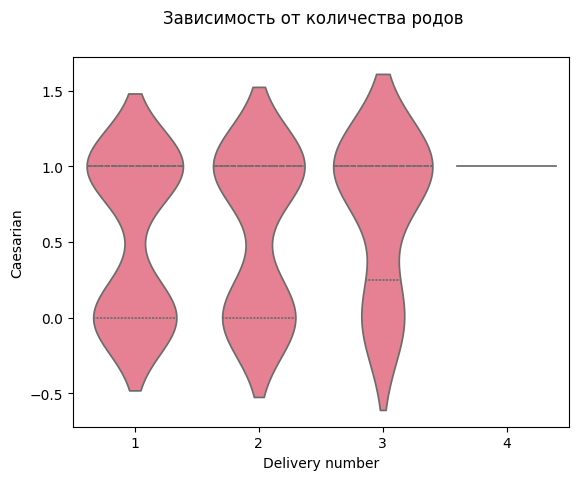

In [12]:
sns.violinplot(y='Caesarian', x='Delivery number', data=df, inner='quartile')
plt.suptitle("Зависимость от количества родов")
plt.show()

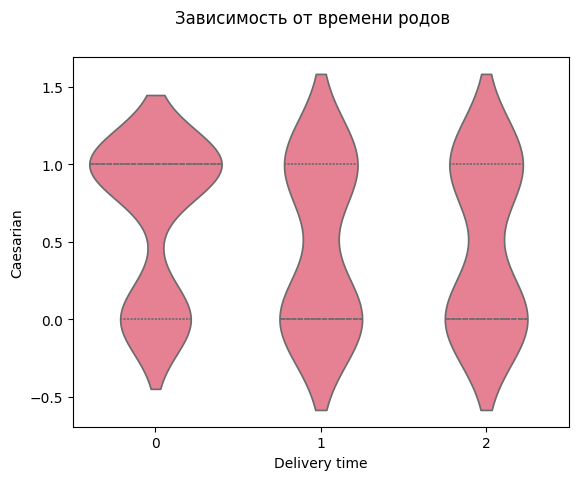

In [13]:
sns.violinplot(y='Caesarian', x='Delivery time', data=df, inner='quartile')
plt.suptitle("Зависимость от времени родов")
plt.show()

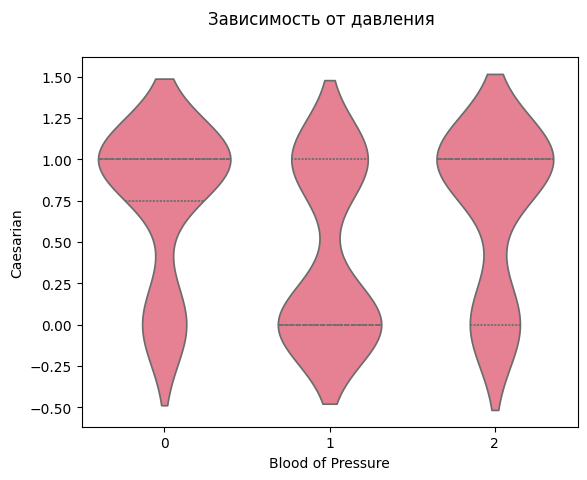

In [14]:
sns.violinplot(y='Caesarian', x='Blood of Pressure', data=df, inner='quartile')
plt.suptitle("Зависимость от давления")
plt.show()

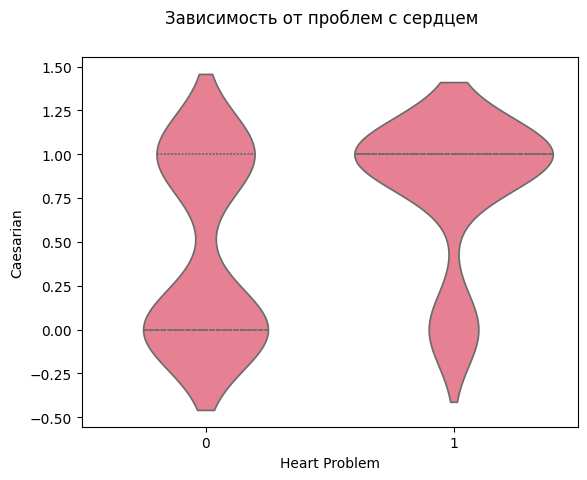

In [15]:
sns.violinplot(y='Caesarian', x='Heart Problem', data=df, inner='quartile')
plt.suptitle("Зависимость от проблем с сердцем")
plt.show()

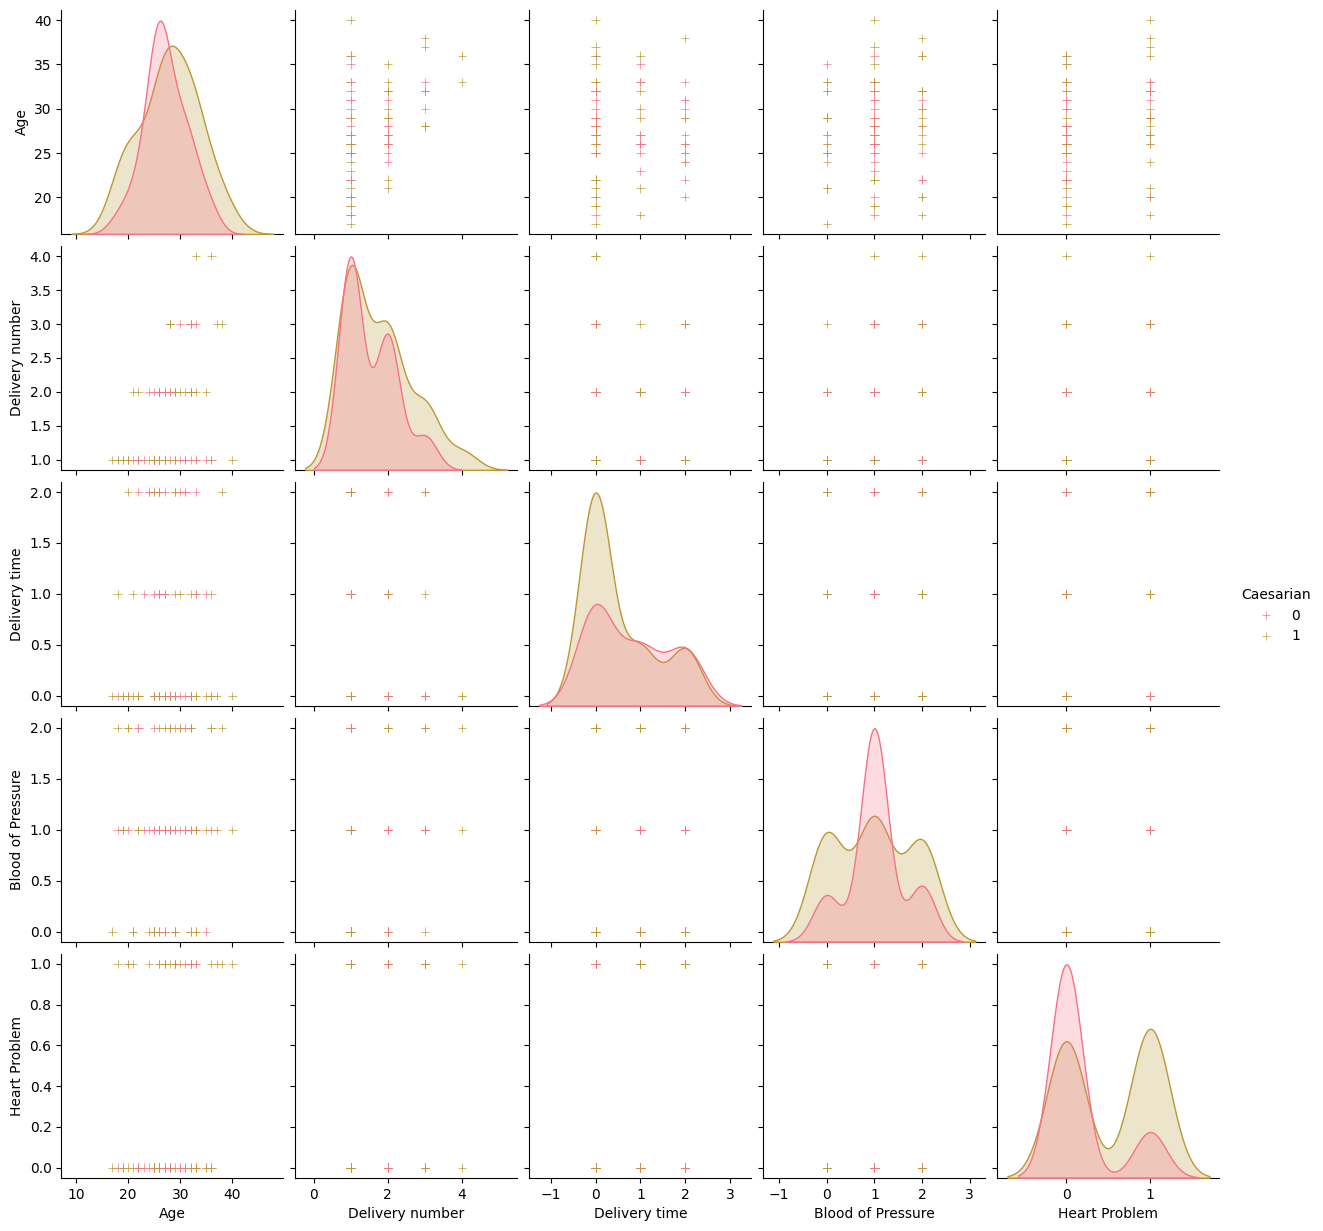

In [16]:
sns.pairplot(df, hue='Caesarian', markers='+')
plt.show()

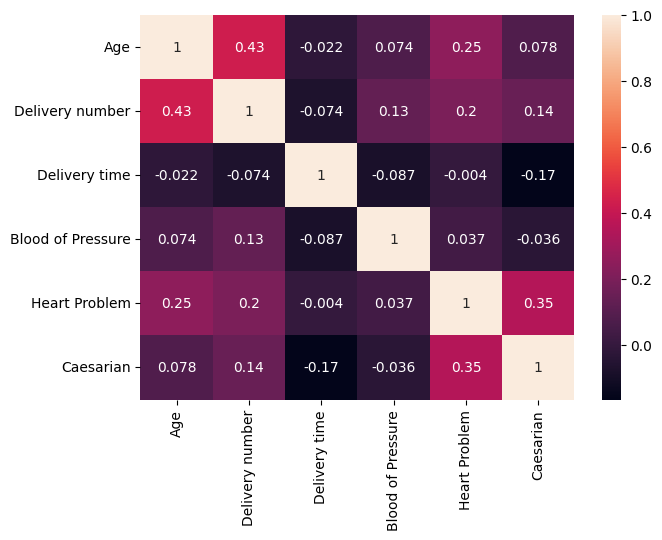

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

In [18]:
#Построение модели
print("___________\nПостроение модели\n___________")
X = df.drop(['Caesarian'], axis=1)
y = df['Caesarian']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

___________
Построение модели
___________
X shape: (80, 5) | y shape: (80,) 


In [19]:
y_mapped = y.map({0: 0, 1: 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

#Обучение конкретной модели
sk_lda = LinearDiscriminantAnalysis(solver='eigen')

sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

LR: 0.695238 (0.182201)
LDA: 0.740476 (0.156293)
KNN: 0.597619 (0.236770)
CART: 0.516667 (0.154322)
NB: 0.721429 (0.178190)
SVC: 0.666667 (0.194889)
sk LDA accuracy: 0.5
sk LDA prediction: [1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0]
sk transformed features
[[-1.55484834  1.68142217  0.13644761  0.0233443  -0.78344189]]


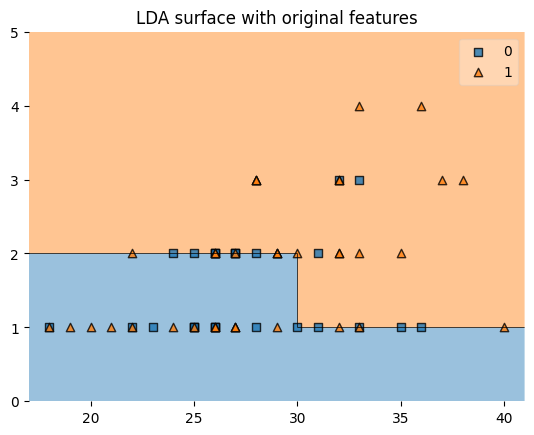

In [20]:
# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['Age','Delivery number']].values

y_2d = y_s.values

sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
  X=X_2d,
  y=y_2d,
  clf=sk_lda1)

plt.show()